In [27]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [28]:
genes='10'
LEN=8
def con_int(x):
    b=int("".join(x[0:]),2)
    # print("hello",x[0],x)
    b=b-2**7
    b=b/2**7
    b=b*2.04
    return b

In [29]:
def mutated_genes():
    gene=random.choice(genes)
    return gene

def create_gnome():
    ans=[]
    for i in range(5):
        gnome_len = LEN
        while 1:
            x=[mutated_genes() for x in range(gnome_len)]
            y=con_int(x)
            if -2.04<=y and y<=2.04:break
        ans.append(x)
    return ans

class Individual:
    def __init__(self,chromosome):
        self.chromosome=chromosome
        self.fitness=self.cal_fitness()

    def cal_fitness(self):
        fitness=0
        x=[con_int(self.chromosome[0]),con_int(self.chromosome[1]),
           con_int(self.chromosome[2]),con_int(self.chromosome[3]),con_int(self.chromosome[4])]
        l1=0
        l2=0
        l3=0
        for i in range(5):
            l1=l1+x[i]**2
            l2=l2+math.floor(x[i])
            l3=l3+((i+1)*(x[i]**4))
        l3=l3+np.random.normal(0,1)
        fitness=l1+l2+l3
        return fitness

    def mutated_genes(self):
        gene=random.choice(genes)
        return gene
    def create_gnome(self):
        ans=[]
        for i in range(5):
            gnome_len = LEN 
            while 1:
                x=[self.mutated_genes() for x in range(gnome_len)]
                y=con_int(x)
                if -2.04<=y and y<=2.04:break
            ans.append(x)
        return ans
    def mutate(self):
        ans=[]
        for i in range(5):
            while(1):
                temp=[]
                for j in range(LEN):
                    if np.random.random()<=mutate_prob:
                        temp.append(self.mutated_genes())
                    else: temp.append(self.chromosome[i][j])
                y=con_int(temp)
                if -2.04<=y and y<=2.04:break
            ans.append(temp)
        return Individual(ans)
                    
    def mate(self,par2):
        child_chromosome_1=[]
        child_chromosome_2=[]
        for i in range(5):
            while 1:
                temp1=[]
                temp2=[]
                for gp1,gp2 in zip(self.chromosome[i],par2.chromosome[i]):
                    prob=random.random()
                    if prob<=0.50:
                        temp1.append(gp1)
                        temp2.append(gp2)
                    else:
                        temp1.append(gp2)
                        temp2.append(gp1)
                y=con_int(temp1)
                y1=con_int(temp2)
                if -2.04<=y and y<=2.04 and -2.04<=y1 and y1<=2.04 :break
            child_chromosome_1.append(temp1)
            child_chromosome_2.append(temp2)
        return (Individual(child_chromosome_1),Individual(child_chromosome_2))


In [37]:
def Random():
    population=[]
    generation=1
    minfitness=100;
    for i in range(POPULATION_SIZE):
        gnome=create_gnome()
        population.append(Individual(gnome))
    for _ in range(itr):
        population = sorted(population, key = lambda x:x.fitness)
        s=POPULATION_SIZE
        new_generation=[]
        for i in range(s):
            if random.randint(0,1):
                new_generation.append(Individual(create_gnome()))
            else:new_generation.append(population[i])
        population=new_generation
        generation += 1
        minfitness=min(minfitness,population[0].fitness)
    x=[con_int(population[0].chromosome[0]),con_int(population[0].chromosome[1]),con_int(population[0].chromosome[2]),
        con_int(population[0].chromosome[3]),con_int(population[0].chromosome[4])]
    print("Value: {}\tFitness: {}".
    format(x,population[0].fitness))
    print("\n")
    return minfitness
        
def Algorithm():
    population=[]
    generation=1
    minfitness=100;
    for i in range(POPULATION_SIZE):
        gnome=create_gnome()
        population.append(Individual(gnome))
        
    for _ in range(itr):
    #     if generation==100:break
        population = sorted(population, key = lambda x:x.fitness)
#         if population[0].fitness<=0:
#             found=True
#             break
        
        new_generation=[]
        s=POPULATION_SIZE
        if ELITISM>0:
            s = int((ELITISM*POPULATION_SIZE)/100) 
            new_generation.extend(population[:s])
            s = int(((100-ELITISM)*POPULATION_SIZE)/100)
        elif DIVERSE==True:
            s = int((10*POPULATION_SIZE)/100)
            for i in range(s):
                x=random.randint(0,POPULATION_SIZE-1)
                new_generation.append(population[x])
            s = int((90*POPULATION_SIZE)/100)
            
        parent1 = population[0]
        parent2 = population[1]
        cross=random.random()
        if cross<=cross_prob:
            (child1,child2)=parent1.mate(parent2)
            for i in range(s):
                if random.randint(0,1):
                    new_generation.append(child1.mutate())
                else: new_generation.append(child2.mutate())
        else:
            for i in range(s):
                x=random.randint(0,POPULATION_SIZE-1)
                if random.randint(0,1):
                    new_generation.append(population[x].mutate())
                else:new_generation.append(population[x])
        population = new_generation
        generation += 1
        minfitness=min(minfitness,population[0].fitness)
    
    x=[con_int(population[0].chromosome[0]),con_int(population[0].chromosome[1]),con_int(population[0].chromosome[2]),
        con_int(population[0].chromosome[3]),con_int(population[0].chromosome[4])]
    print("Value: {}\tFitness: {}".
    format(x,population[0].fitness))
    print("\n")
    return minfitness

Parameters are as follows
POPULATION:  50 
Cross_prob:  0.2 
Mutation_prob:  0.01
Iteration:  10

Random search:
Value: [0.0796875, -0.7171875, 0.7490625, 0.1753125, 0.286875]	Fitness: 0.480762599499277



Basic Genetic algorithm:
Value: [-0.0478125, -1.1475, -0.0478125, -0.796875, 0.860625]	Fitness: 5.207598752211916



GA with elitism as top  10  is chosen in next generation
Value: [-0.2071875, -0.286875, -0.095625, -0.7490625, 0.2071875]	Fitness: -2.5233758542834526



GA with Diversity
Value: [0.82875, 0.7490625, -0.095625, -0.4940625, 0.46218750000000003]	Fitness: 1.9227833650309634


Parameters are as follows
POPULATION:  50 
Cross_prob:  0.3 
Mutation_prob:  0.01
Iteration:  10

Random search:
Value: [-0.4940625, -0.1434375, -1.9603125000000001, -1.7850000000000001, -0.605625]	Fitness: 88.42656864099175



Basic Genetic algorithm:
Value: [0.51, -1.625625, -0.7809375000000001, 0.06375, -0.095625]	Fitness: 16.690522204213977



GA with elitism as top  10  is chosen in next generat

Value: [-0.2071875, -0.8446875, 0.6375, -0.1434375, 0.82875]	Fitness: 2.9271908466427297



Basic Genetic algorithm:
Value: [-1.3865625, -0.31875, -0.0159375, -0.8765625, -1.2590625]	Fitness: 16.83157479717776



GA with elitism as top  10  is chosen in next generation
Value: [0.2071875, -0.255, 0.0478125, -0.2071875, 0.6375]	Fitness: -2.731621372781637



GA with Diversity
Value: [-0.2390625, -0.3825, -0.5896875, -0.11156250000000001, -0.8446875]	Fitness: -0.8349932432454867


Parameters are as follows
POPULATION:  50 
Cross_prob:  0.3 
Mutation_prob:  0.05
Iteration:  20

Random search:
Value: [1.434375, -1.8009375, -1.21125, 1.498125, 1.8009375]	Fitness: 115.07946691218056



Basic Genetic algorithm:
Value: [-1.944375, -0.988125, -0.5896875, 0.0796875, 0.350625]	Fitness: 16.952351009739434



GA with elitism as top  10  is chosen in next generation
Value: [0.031875, -0.031875, -0.0159375, -0.669375, -0.7490625]	Fitness: -4.16372502585445



GA with Diversity
Value: [2.008125, -0.111

Value: [-0.095625, -0.159375, -1.306875, 0.3984375, -0.0159375]	Fitness: 6.000269298670295



Basic Genetic algorithm:
Value: [0.8128125, -0.286875, -0.6853125, 0.4303125, 0.0796875]	Fitness: 1.5062924081873383



GA with elitism as top  10  is chosen in next generation
Value: [-0.095625, -0.6853125, -0.286875, -0.255, -0.22312500000000002]	Fitness: -6.6182905040672315



GA with Diversity
Value: [0.11156250000000001, 0.1434375, 0.2709375, 0.5259375000000001, -0.11156250000000001]	Fitness: 0.7043001407217849


Parameters are as follows
POPULATION:  100 
Cross_prob:  0.3 
Mutation_prob:  0.01
Iteration:  50

Random search:
Value: [1.8328125, -0.7171875, 0.159375, 1.97625, -0.8128125]	Fitness: 84.7776460777457



Basic Genetic algorithm:
Value: [0.031875, 0.031875, -0.414375, -0.2071875, -0.286875]	Fitness: -1.4517906728204522



GA with elitism as top  10  is chosen in next generation
Value: [0.478125, -0.255, -0.669375, 0.3825, -0.22312500000000002]	Fitness: -4.413254003034238



GA wi

Value: [-0.2071875, -0.0159375, -0.2071875, 0.0478125, 0.1753125]	Fitness: -2.496845067039406


Parameters are as follows
POPULATION:  100 
Cross_prob:  0.2 
Mutation_prob:  0.05
Iteration:  100

Random search:
Value: [1.8328125, 1.243125, -1.1634375000000001, 1.46625, 0.3825]	Fitness: 48.47201763722359



Basic Genetic algorithm:
Value: [-0.06375, -0.3825, -0.3665625, -0.2390625, -0.255]	Fitness: -4.6947968454633315



GA with elitism as top  10  is chosen in next generation
Value: [0.44625000000000004, 0.0, 0.4940625, -0.0796875, 0.22312500000000002]	Fitness: -3.1926234367171924



GA with Diversity
Value: [-0.3028125, 1.8965625, -1.689375, -0.3346875, 0.031875]	Fitness: 54.42543271976489


Parameters are as follows
POPULATION:  100 
Cross_prob:  0.3 
Mutation_prob:  0.05
Iteration:  100

Random search:
Value: [-0.1434375, -0.7490625, -0.3984375, -1.7690625, 0.8925000000000001]	Fitness: 43.2896122517851



Basic Genetic algorithm:
Value: [-0.0159375, -0.095625, -0.031875, -0.11156250

Value: [-0.031875, -0.11156250000000001, 0.1434375, -0.478125, -0.1275]	Fitness: -2.2680186333361605



GA with elitism as top  10  is chosen in next generation
Value: [-0.6375, -0.031875, 0.3825, -0.06375, -0.0478125]	Fitness: -6.470323325764168



GA with Diversity
Value: [-0.11156250000000001, -0.1434375, 0.1434375, -0.0796875, 0.414375]	Fitness: -3.624863866244099


Parameters are as follows
POPULATION:  200 
Cross_prob:  0.2 
Mutation_prob:  0.01
Iteration:  200

Random search:
Value: [-0.6375, 0.0159375, -0.669375, -0.19125, 0.57375]	Fitness: -0.8991929625191024



Basic Genetic algorithm:
Value: [-0.0159375, 0.2709375, 0.22312500000000002, -0.1275, 0.0159375]	Fitness: -2.3414793593214918



GA with elitism as top  10  is chosen in next generation
Value: [0.3665625, -0.46218750000000003, -0.0159375, -0.06375, -0.286875]	Fitness: -7.610039905132857



GA with Diversity
Value: [0.19125, -0.0796875, -0.06375, -0.1275, 0.3028125]	Fitness: -3.837958302713271


Parameters are as follow

Value: [0.3984375, -0.5896875, -0.11156250000000001, -0.5259375000000001, -0.159375]	Fitness: -2.847430402718886


Parameters are as follows
POPULATION:  200 
Cross_prob:  0.3 
Mutation_prob:  0.01
Iteration:  500

Random search:
Value: [1.1475, 0.8925000000000001, 1.2909375, 1.3228125, -0.095625]	Fitness: 32.004302817003406



Basic Genetic algorithm:
Value: [-0.1275, 0.1753125, 0.1753125, -0.2071875, 0.22312500000000002]	Fitness: -1.701893703539812



GA with elitism as top  10  is chosen in next generation
Value: [0.1434375, -0.22312500000000002, -0.3346875, -0.3665625, -0.2071875]	Fitness: -7.513010316572255



GA with Diversity
Value: [-0.3825, -0.19125, -0.095625, -0.1275, -0.1275]	Fitness: -6.6436938123621125


Parameters are as follows
POPULATION:  200 
Cross_prob:  0.2 
Mutation_prob:  0.05
Iteration:  500

Random search:
Value: [-0.4303125, -1.0678125, -1.306875, 1.370625, -0.82875]	Fitness: 28.24226295453871



Basic Genetic algorithm:
Value: [-0.1434375, -1.0518750000000001

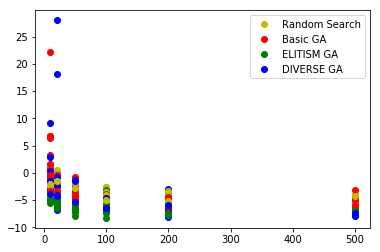

In [40]:
MP=[0.01,0.05]
CP=[0.2,0.3]
P=[50,100,200]
ITR=[10, 20, 50, 100, 200, 500]
fitness=[0,0,0,0]
first=False
for itr in ITR:
    for POPULATION_SIZE in P:
        for mutate_prob in MP:
            for cross_prob in CP:
                ELITISM=0
                DIVERSE=False
                print("Parameters are as follows")
                print("POPULATION: ",POPULATION_SIZE,"\nCross_prob: ",cross_prob,"\nMutation_prob: ",mutate_prob)
                print("Iteration: ",itr)
                print("\nRandom search:")
                fitness[0]=Random()
                print("\nBasic Genetic algorithm:")
                fitness[1]=Algorithm()
                
                ELITISM=10
                print("\nGA with elitism as top ",ELITISM," is chosen in next generation")
                fitness[2]=Algorithm()
                
                ELITISM=0
                DIVERSE=True
                print("\nGA with Diversity")
                fitness[3]=Algorithm()
                if(first==False):
                    plt.plot(itr,fitness[0],'ro',color='y',label='Random Search')
                    plt.plot(itr,fitness[1],'ro',color='r',label='Basic GA')
                    plt.plot(itr,fitness[2],'ro',color='g',label='ELITISM GA')
                    plt.plot(itr,fitness[3],'ro',color='b',label='DIVERSE GA')
                    first=True
                else:
                    plt.plot(itr,fitness[0],'ro',color='y')
                    plt.plot(itr,fitness[1],'ro',color='r')
                    plt.plot(itr,fitness[2],'ro',color='g')
                    plt.plot(itr,fitness[3],'ro',color='b')
            
plt.legend()